<Figure size 432x288 with 0 Axes>

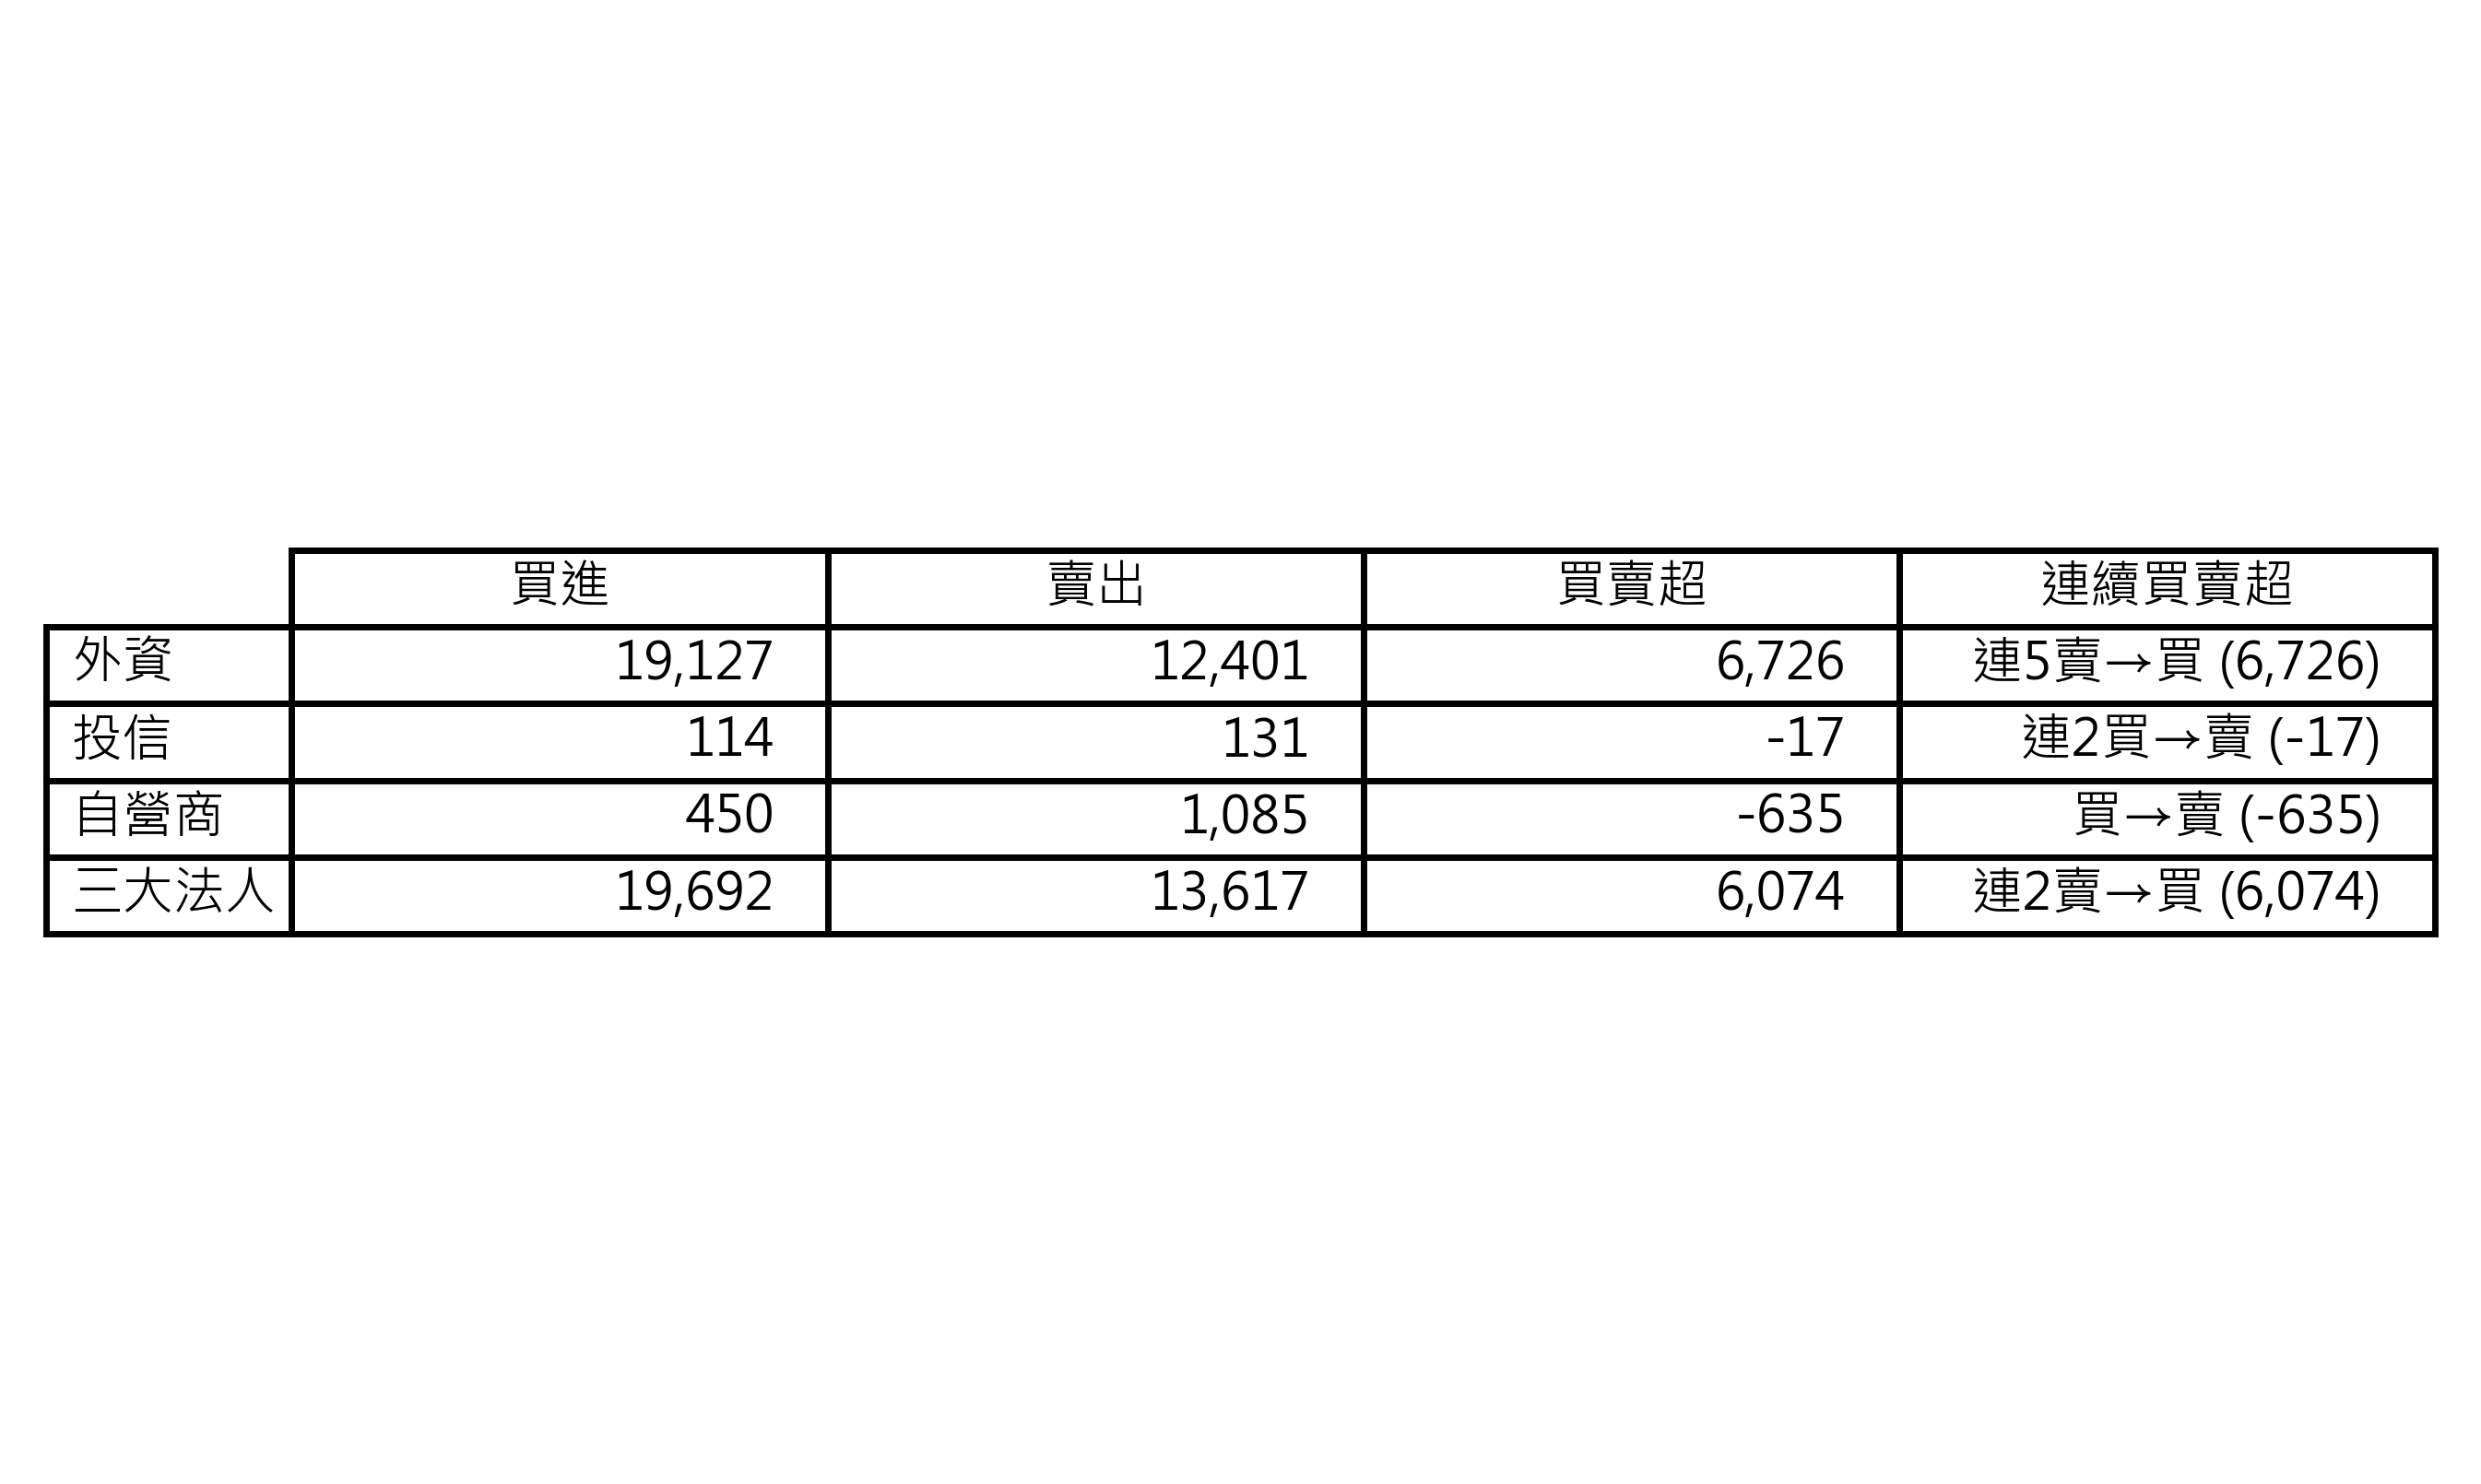

In [3]:
date = []
foreign_inv = []
credit = []
self_employed = []
total = []
foreign_sharehold = []
for i in soup1:
　　soup2 = i.find_all("div")
　　date.append(soup2[1].text)
　　foreign_inv.append(soup2[2].text)
　　credit.append(soup2[3].text)
　　self_employed.append(soup2[4].text)
　　total.append(soup2[5].text)
　　foreign_sharehold.append(soup2[6].text)
df = pd.DataFrame({"日期":date,"外資(張)":foreign_inv,"投信(張)":credit,"自營商(張)":self_employed,"合計(張)":total,"外資持股率(%)":foreign_sharehold})
df.index = pd.to_datetime(df["日期"])
df.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
df.drop("日期",axis = 1,inplace=True)
int_ = ["外資(張)","投信(張)","自營商(張)","合計(張)"]
for i in int_:
　　df[i] = df[i].apply(lambda x: x.replace(",","")).astype("int64")
df["外資持股率(%)"] = df["外資持股率(%)"].apply(lambda x: x.replace("%","")).astype(float)